In [1]:
import pandas as pd


In [2]:
c=pd.read_csv(r"F:\PGA22\pandas_Dataset\Churn.csv")

In [3]:
#pronblem:
#    1:leave the bank account
#    0:not leave bank account

In [4]:
c.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
c.shape

(7043, 21)

In [6]:
c=c.iloc[:,1:21]

In [7]:
c.shape

(7043, 20)

In [8]:
c.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [25]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
c[c.select_dtypes(include=["object"]).columns]=c[c.select_dtypes(include=["object"]).columns].apply(le.fit_transform)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
#c_x=c.iloc[:,0:19]
#c_y=c.iloc[:,-1]

In [19]:
c_train,c_test=train_test_split(c,test_size=.2,random_state=111)

In [20]:
c_train_x=c_train.iloc[:,0:19]
c_train_y=c_train.iloc[:,-1]

In [21]:
c_test_x=c_test.iloc[:,0:19]
c_test_y=c_test.iloc[:,-1]

In [26]:
print(c_train_x.shape)
print(c_train_y.shape)


print(c_test_x.shape)
print(c_test_y.shape)

(5634, 19)
(5634,)
(1409, 19)
(1409,)


In [ ]:
c_x_train,c_x_test,c_y_train,c_y_test=train_test_split(c_x,c_y,test_size=.2,random_state=111)

In [11]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(c_train_x,c_train_y)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
pred_test_y=reg.predict(c_test_x)

In [13]:
print(pred_test_y)

[0 0 1 ... 1 0 0]


In [14]:
from sklearn.metrics import confusion_matrix
tab_cr = confusion_matrix(pred_test_y , c_test_y)
tab_cr # precision is:0.4199 so we have to bear costonly for wrong prediction of(fp)138

array([[932, 146],
       [138, 193]], dtype=int64)

# oversampling for class 1

In [15]:
# for oversamplingsampling
df1=c_train[c_train.Churn==1]





In [16]:
c_train.shape

(5634, 21)

In [18]:
df1.shape

(1530, 21)

In [19]:
c_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6904,4405,0,1,0,0,64,0,1,0,0,...,0,2,2,0,0,1,2,43.85,2391,0
3256,5479,1,0,1,1,61,1,0,0,2,...,2,2,2,2,1,0,0,84.90,4404,0
6679,3488,0,0,1,0,60,0,1,0,2,...,0,2,0,0,2,0,0,37.70,1927,0
3190,2633,1,0,1,1,66,0,1,0,0,...,2,2,2,2,2,0,0,54.65,3139,0
5040,6982,1,0,1,1,20,1,2,1,0,...,0,2,2,0,0,0,3,96.80,1380,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4182,3457,0,1,0,0,29,1,2,1,0,...,0,2,2,2,0,0,2,98.65,2471,1
4820,3998,0,0,1,0,58,1,2,0,2,...,2,2,2,2,2,1,2,84.30,4166,0
2004,6045,1,0,0,0,24,1,2,1,0,...,2,0,2,0,0,1,3,89.85,1779,1
7020,6934,1,0,1,1,12,1,0,2,1,...,1,1,1,1,0,1,2,19.20,2024,0


In [20]:
df1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4089,2989,0,0,0,0,9,1,2,1,0,...,0,0,0,0,0,1,2,74.75,5548,1
1412,5585,0,0,1,0,15,1,0,1,0,...,2,0,2,0,0,1,2,84.30,565,1
1248,5204,0,0,0,0,11,1,2,1,0,...,0,2,2,0,0,0,2,90.15,6506,1
4237,4771,1,0,0,0,5,1,0,0,0,...,2,0,2,2,0,1,2,70.05,2993,1
6032,6418,1,1,1,0,68,1,2,1,0,...,2,0,2,2,0,1,2,105.30,5661,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5063,2632,1,0,0,0,21,1,2,1,0,...,0,0,0,0,0,1,2,82.35,1418,1
4214,2960,1,0,0,0,4,1,2,1,0,...,0,0,0,2,0,1,2,90.05,3171,1
4182,3457,0,1,0,0,29,1,2,1,0,...,0,2,2,2,0,0,2,98.65,2471,1
2004,6045,1,0,0,0,24,1,2,1,0,...,2,0,2,0,0,1,3,89.85,1779,1


In [21]:
df1_train=pd.concat([c_train,df1])

In [22]:
df1_train.shape

(7164, 21)

In [23]:
c_train_x=df1_train.iloc[:,0:19]
c_train_y=df1_train.iloc[:,-1]

In [24]:
c_test_x=c_test.iloc[:,0:19]
c_test_y=c_test.iloc[:,-1]

In [25]:
from sklearn.linear_model import LogisticRegression
reg1=LogisticRegression()
reg1.fit(c_train_x,c_train_y)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
pred_test_y=reg1.predict(c_test_x)
print(pred_test_y)

[0 0 1 ... 1 0 1]


In [29]:
from sklearn.metrics import confusion_matrix
tab_di=confusion_matrix(pred_test_y,c_test_y)# precision is:0.4940

In [27]:
tab_di 3 #there is  a problem of cost of penalizing customer for unnecessary 255 customer. as precision is high as comapre to before sampling model 1.
#so from these scenarion we will prefer to use model 1 instead of after smapling

array([[815,  90],
       [255, 249]], dtype=int64)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_test_y,c_test_y)

0.7551454932576295

In [ ]:
#1. if we look at confusion matrix before resampling(model A)and after resampling(model B)model b seems good as prediction is good for class 1 which we expect.
#2. second scenario where we can prefer model A:precision: model 1:58 precision se less cose price to punish for false positiveso we prefer model 1
#model 2:0.50 precision

In [ ]:
# decision tree I have Done this separately  in decisiontree folder.

In [35]:
c.shape

(7043, 20)

In [36]:
c=c.iloc[:,1:21]

In [64]:
c_x=c.iloc[:,0:19]
c_y=c.iloc[:,-1]

In [65]:
c_x.shape

(7043, 19)

In [66]:
c_x_train,c_x_test,c_y_train,c_y_test=train_test_split(c_x,c_y,test_size=.2,random_state=111)

In [67]:
c_x_train.shape

(5634, 19)

In [68]:
c_y_train.shape

(5634,)

In [69]:
c_x_test.shape

(1409, 19)

In [70]:
c_x_test.shape

(1409, 19)

In [84]:
from sklearn.tree import DecisionTreeClassifier
dt10=DecisionTreeClassifier(class_weight="balanced",max_depth=4)
dt10.fit(c_x_train,c_y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [86]:
pred_y_test=dt10.predict(c_x_test)
print(pred_y_test)

[0 0 1 ... 1 1 1]


In [87]:
from sklearn.metrics import confusion_matrix
tab_cr=confusion_matrix(pred_y_test,c_y_test)
print(tab_cr)

[[734  68]
 [336 271]]


In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_y_test,c_y_test)

0.7132718239886444

In [89]:
from IPython.display import Image

In [90]:
from sklearn.externals.six import StringIO

In [91]:
from sklearn.tree import export_graphviz

In [92]:
import pydot

In [93]:
import pydotplus

In [94]:
c_x_train_names=c_x_train.columns

In [95]:
import matplotlib.pyplot as plt

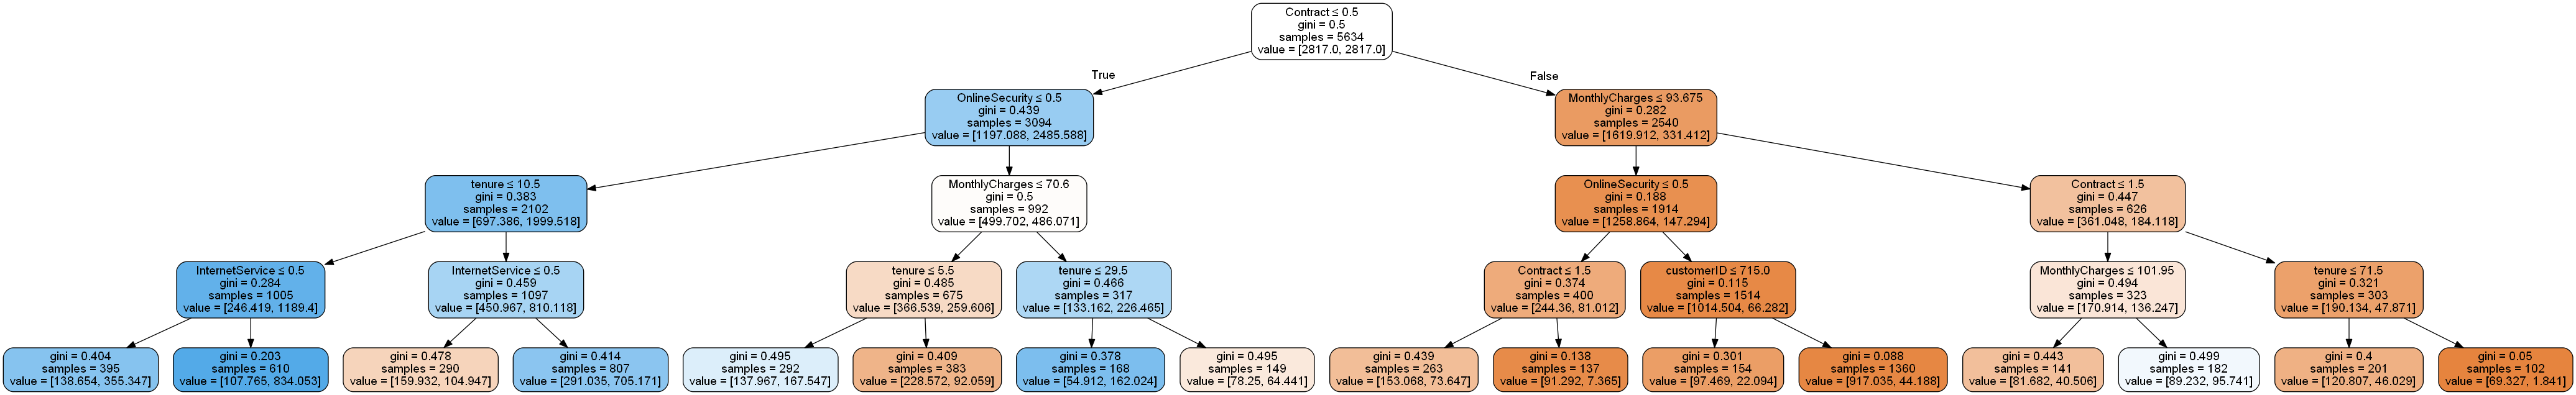

<Figure size 864x864 with 0 Axes>

In [96]:
fig=plt.figure(figsize=(12,12))
dot_data=StringIO()
export_graphviz(dt10,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=c_x_train_names)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
(graph,)=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [97]:
from sklearn.model_selection import GridSearchCV
search_dict={"criterion":["gini","entropy"],"max_depth":range(3,10),"min_samples_split":range(25,50)}
grid=GridSearchCV(dt10,param_grid=search_dict)
grid.fit(c_x_train,c_y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=4,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'

In [98]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 25}